<a href="https://colab.research.google.com/github/shailamalkani/als-risk-prediction/blob/main/AI_project_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and setting up


In [ ]:
import pandas as pd
import numpy as np
from numpy import sqrt
import sklearn
from sklearn import preprocessing
import os
from google.colab import drive
import pickle

In [ ]:
#google drive set-up
os.getcwd()
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Loading genomics data

In [ ]:
path = "/content/gdrive/MyDrive/project data/geno_bin NEW.csv"
df = pd.read_csv(path, index_col=0)
dfnew = df.T #transposing the dataframe
dfnew

,rs41285790,rs772007449,rs9988179,rs28419423,rs200848321,rs751035336,rs199625867,rs145967298,rs568340123,rs745625383,...,rs758583631,rs763365685,rs28494975,rs369451370,rs141017429,rs201165738,rs3093494,rs763423994,chrX:156004509,rs150608249
CASE-NEUMN012EVP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CASE-NEUJY426MBU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CASE-NEUTM934BPY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CASE-NEUGD965XVD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CASE-NEUJA217MTJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTRL-NEUFL840LZE,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTRL-NEUDA782GW3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTRL-NEUNW343RXP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CASE-NEUPD674JPG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Loading clinical data (case control)


In [ ]:
#loading data and changing the format
clinical_data = "/content/gdrive/MyDrive/project data/aals_participants.csv"
clinical_df = pd.read_csv(clinical_data)
clinical_df = clinical_df.replace(['Healthy Control','Case'],['0','1'])
clinical_df = clinical_df.drop(["GUID", "Sex", "Cohort", "Diagnosis", "Enrollment Status", "Notes"], axis=1).set_index("Participant_ID")
clinical_df


,Case_Control
Participant_ID,
CASE-NEUAA599TMX,1
CASE-NEUAB000NKC,1
CASE-NEUAE993EPR,1
CASE-NEUAF553MJ3,1
CASE-NEUAG603XLK,1
...,...
CTRL-NEUVZ050YX7,0
CTRL-NEUWT164JRQ,0
CTRL-NEUYM011FER,0


In [ ]:
#subsetting the dataframe and aligning geno bin df with clinical df
subset_clinical_df = clinical_df.loc[dfnew.index]
print(subset_clinical_df.shape)
clinical_df["Case_Control"].value_counts()


(153, 1)


1    138
0     32
Name: Case_Control, dtype: int64

Summary statistics from project mine


In [ ]:
#testing to see format of data

path4 = "/content/gdrive/MyDrive/project data/summary_statistics/als.sumstats.lmm.chr1.csv"
testdf = pd.read_csv(path4)
testdf

,chr snp bp a1 a2 freq b se p
0,1 rs16841029 165176498 C G 0.904652 0.00565004...
1,1 rs58325639 188816626 C T 0.968803 -0.0186183...
2,1 rs1146577 76203863 T G 0.0708967 0.00845506 ...
3,1 rs141439997 24529644 C T 0.886252 -0.0063171...
4,1 rs2187876 172566232 A G 0.430701 -0.00398566...
...,...
591969,1 rs57858001 40262102 AC A 0.916867 0.00472555...
591970,1 rs2209098 172167226 T C 0.676529 -0.00729161...
591971,1 rs150103137 164985805 T G 0.976038 -0.003813...
591972,1 rs17593673 235100334 A T 0.893075 0.00600699...


Concatenate all csv files into one master file

In [ ]:
import glob

path = r'/content/gdrive/MyDrive/project data/summary_statistics'                     
all_files = glob.glob(os.path.join(path, "*.csv"))     
df_from_each_file = (pd.read_csv(f, delim_whitespace=True) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df

,chr,snp,bp,a1,a2,freq,b,se,p
0,2,rs140845162,16269545,C,T,0.956344,0.016675,0.010385,0.108355
1,2,rs111472651,44117788,C,G,0.945557,0.005135,0.007671,0.503209
2,2,rs62195046,206819964,C,T,0.809910,0.002249,0.004694,0.631809
3,2,rs7593161,156016188,C,G,0.789322,0.001804,0.004204,0.667875
4,2,rs62154378,122666713,G,A,0.727896,0.001787,0.003850,0.642534
...,...,...,...,...,...,...,...,...,...
7740339,1,rs57858001,40262102,AC,A,0.916867,0.004726,0.006415,0.461350
7740340,1,rs2209098,172167226,T,C,0.676529,-0.007292,0.003679,0.047512
7740341,1,rs150103137,164985805,T,G,0.976038,-0.003813,0.011393,0.737845
7740342,1,rs17593673,235100334,A,T,0.893075,0.006007,0.005698,0.291775


In [ ]:
snp_df = concatenated_df.drop(["chr", "a1", "a2", "freq", "bp", "b", "se"], axis=1)
snp_df
snp_df_indexed = snp_df.set_index('snp') #setting index as the snp column
snp_df_indexed

,p
snp,
rs140845162,0.108355
rs111472651,0.503209
rs62195046,0.631809
rs7593161,0.667875
rs62154378,0.642534
...,...
rs57858001,0.461350
rs2209098,0.047512
rs150103137,0.737845


In [ ]:
#see which snps are in geno bin df
subset_snps = snp_df_indexed[snp_df_indexed.index.isin(dfnew.columns)]
subset_snps

,p
snp,
rs61730415,0.595980
rs35495464,0.329128
rs2230370,0.638604
rs56038532,0.733988
rs35212307,0.773593
...,...
rs10494745,0.527804
rs75770915,0.030031
rs41301291,0.084038


In [ ]:
#sorting p values in ascending order
sorted_snps = subset_snps.sort_values("p")
sorted_snps

,p
snp,
rs75087725,2.647800e-09
rs41292019,1.345770e-07
rs35098198,8.810680e-06
rs113247976,1.217590e-05
rs752493,5.116190e-05
...,...
rs33958906,9.997540e-01
rs80029472,9.998230e-01
rs10872326,9.998250e-01


In [ ]:
ss = sorted_snps.head(153)
print(ss)

                        p
snp                      
rs75087725   2.647800e-09
rs41292019   1.345770e-07
rs35098198   8.810680e-06
rs113247976  1.217590e-05
rs752493     5.116190e-05
...                   ...
rs34820000   6.604170e-03
rs5442       6.649820e-03
rs79308175   6.678100e-03
rs41274674   6.681500e-03
rs117479929  6.795960e-03

[153 rows x 1 columns]


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(ss)

                        p
snp                      
rs75087725   2.647800e-09
rs41292019   1.345770e-07
rs35098198   8.810680e-06
rs113247976  1.217590e-05
rs752493     5.116190e-05
rs61741802   5.238470e-05
rs140610432  6.039300e-05
rs61732313   7.594240e-05
rs140391716  8.555120e-05
rs3747951    1.058030e-04
rs2230169    1.066190e-04
rs61729556   1.223490e-04
rs13093808   1.280000e-04
rs2295275    1.316280e-04
rs35577851   2.256660e-04
rs116497247  2.855440e-04
rs148526074  3.434550e-04
rs11711953   3.656670e-04
rs111376436  5.679310e-04
rs61752317   5.786840e-04
rs61742924   6.498050e-04
rs117043746  6.514380e-04
rs25664      6.787910e-04
rs7133914    7.521050e-04
rs11555978   7.613430e-04
rs8087843    7.698300e-04
rs8106       7.939750e-04
rs3851304    8.550540e-04
rs71501812   8.822460e-04
rs34757266   9.147620e-04
rs11784217   9.215080e-04
rs36093393   9.456160e-04
rs56335758   9.622070e-04
rs2234668    1.018790e-03
rs35944172   1.018970e-03
rs7308720    1.026960e-03
rs11585761  

Machine Learning set-up

In [ ]:
# Choosing the top __ SNPs
totalsnps = 153
selected_snps = sorted_snps.iloc[:totalsnps].index
selected_snps[:100]

Index(['rs75087725', 'rs41292019', 'rs35098198', 'rs113247976', 'rs752493',
       'rs61741802', 'rs140610432', 'rs61732313', 'rs140391716', 'rs3747951',
       'rs2230169', 'rs61729556', 'rs13093808', 'rs2295275', 'rs35577851',
       'rs116497247', 'rs148526074', 'rs11711953', 'rs111376436', 'rs61752317',
       'rs61742924', 'rs117043746', 'rs25664', 'rs7133914', 'rs11555978',
       'rs8087843', 'rs8106', 'rs3851304', 'rs71501812', 'rs34757266',
       'rs11784217', 'rs36093393', 'rs56335758', 'rs2234668', 'rs35944172',
       'rs7308720', 'rs11585761', 'rs11762125', 'rs55910638', 'rs17227424',
       'rs455527', 'rs17132707', 'rs3809975', 'rs7853155', 'rs41283425',
       'rs7655924', 'rs1805323', 'rs114093789', 'rs12319', 'rs11175964',
       'rs55762230', 'rs35892913', 'rs363075', 'rs61737920', 'rs3782225',
       'rs17346397', 'rs35066273', 'rs3109650', 'rs28407189', 'rs17508704',
       'rs115554157', 'rs140277704', 'rs3093921', 'rs79470022', 'rs80329914',
       'rs74369960',

In [ ]:
#subsetting geno bin snps
subset_geno_df = dfnew[selected_snps]
#checking if rows align
np.all(subset_geno_df.index == subset_clinical_df.index)

True

In [ ]:
#New variables for x and y
X = subset_geno_df
y = subset_clinical_df
X.shape, y.shape

((153, 153), (153, 1))

# Machine learning

In [ ]:
#imports
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#splitting x and y into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [ ]:
#checking shape of x objects
print(X_train.shape)
print(X_test.shape)

(122, 153)
(31, 153)


In [ ]:
#getting class proportions

#train_class_proportions = get_class_proportions(X_train) print(train_class_proportions)

In [ ]:
#checking shape of y objects
print(y_train.shape)
print(y_test.shape)

(122, 1)
(31, 1)


## Logistic regression

In [ ]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

logmodel = LogisticRegression(C = 10e9, penalty = 'l1', solver = 'liblinear')
logmodel.fit(X_train, y_train.values.ravel())
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logmodel.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
print(importances)

       Attribute  Importance
50    rs55762230   15.395169
71     rs1044563   10.606722
3    rs113247976    9.504389
141  rs189036928    9.391003
48       rs12319    9.080334
151   rs41274674    8.899210
5     rs61741802    8.148106
95    rs56197520    7.726039
105   rs35462609    7.632593
118  rs138705766    7.588271
136   rs55686434    7.576564
61   rs140277704    7.533453
19    rs61752317    7.254628
16   rs148526074    7.217700
58    rs28407189    6.827520
10     rs2230169    6.228669
111    rs2272852    5.919872
14    rs35577851    5.919069
31    rs36093393    5.718219
22       rs25664    5.680842
84   rs115905625    5.321085
115   rs17152897    5.307603
60   rs115554157    5.191796
87    rs10258764    5.161435
114   rs35118457    4.810881
125   rs17482536    4.682096
62     rs3093921    4.636694
17    rs11711953    4.400693
128   rs17260403    4.386188
73    rs55906165    4.014922
137  rs140895856    3.891641
41    rs17132707    3.810425
130   rs75463357    3.751857
28    rs715018

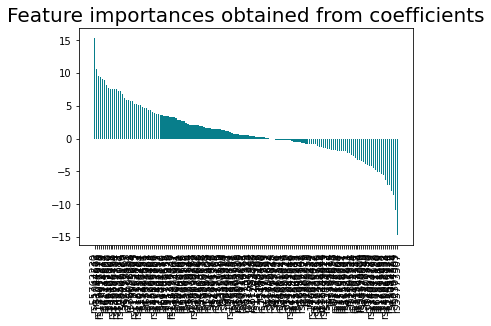

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# predictions on test set
predictions = logmodel.predict(X_test)
predictions.shape

(31,)

In [ ]:
#accuracy score
lraccuracy = logmodel.score(X_test, y_test)
print(lraccuracy)

0.7096774193548387


In [ ]:
#grid search
from sklearn.model_selection import GridSearchCV
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
lrmodel_grid = GridSearchCV(estimator=LogisticRegression(), param_grid = hyperparameters, verbose=1, cv=5, n_jobs=-1)
lrmodel_grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=1)

In [ ]:
lrmodel_grid.best_params_

{'C': 2.7825594022071245, 'penalty': 'l1', 'solver': 'saga'}

AUC value : Logistic regression

In [ ]:
#training auc
#prediction probability
trainlogmodel_probs = logmodel.predict_proba(X_train)
#positive outcomes?
trainlogmodel_probs = trainlogmodel_probs[:,1]
trainlogmodel_auc = roc_auc_score(y_train, trainlogmodel_probs)
print(trainlogmodel_auc)

1.0


In [ ]:
#prediction probability
logmodel_probs = logmodel.predict_proba(X_test)
#positive outcomes?
logmodel_probs = logmodel_probs[:,1]


In [ ]:
logmodel_auc = roc_auc_score(y_test, logmodel_probs)
print(logmodel_auc)

0.5333333333333333


In [ ]:
#AUPR logistic regression
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
y_score = logmodel.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score, pos_label="1")
print(average_precision)

0.8601245088956119


##Random Forest

Baseline model

In [ ]:
#baseline model
baselinerf = RandomForestClassifier(bootstrap = True, class_weight = 'balanced', max_depth = 8, min_samples_leaf = 1, min_samples_split = 5, n_estimators =100)
baselinerf.fit(X_train, y_train.values)
#roc_auc scoring
baselinetrainrf_probs = baselinerf.predict_proba(X_train)
#positive outcomes?
baselinetrainrf_probs = baselinetrainrf_probs[:,1]
baselinetrainrf_auc = roc_auc_score(y_train, baselinetrainrf_probs)
print(baselinetrainrf_auc)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.0


In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': baselinerf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
print(importances)

       Attribute    Importance
148   rs34820000  3.401529e-02
135   rs67511110  2.833847e-02
145   rs11907248  2.797539e-02
124   rs16919452  2.152852e-02
136   rs55686434  2.038369e-02
119    rs2307393  1.995578e-02
51    rs35892913  1.845919e-02
95    rs56197520  1.840892e-02
96     rs2278240  1.812536e-02
71     rs1044563  1.698281e-02
133   rs75072999  1.663535e-02
17    rs11711953  1.657935e-02
10     rs2230169  1.428144e-02
116   rs11558747  1.413298e-02
128   rs17260403  1.373823e-02
26        rs8106  1.363515e-02
52      rs363075  1.363455e-02
23     rs7133914  1.357390e-02
35     rs7308720  1.269564e-02
117   rs17298941  1.268390e-02
70    rs35744844  1.211654e-02
123    rs2307389  1.166386e-02
110   rs41307074  1.132701e-02
63    rs79470022  1.122734e-02
27     rs3851304  1.097305e-02
59    rs17508704  1.088549e-02
31    rs36093393  1.079336e-02
48       rs12319  1.034420e-02
151   rs41274674  9.866301e-03
76     rs1063571  9.728723e-03
144    rs9901675  9.716475e-03
49    rs

In [ ]:
#baseline testing AUC_ROC
baselinetestrf_probs = baselinerf.predict_proba(X_test)
baselinerf_probs = baselinetestrf_probs[:,1]
baselinetestrf_auc = roc_auc_score(y_test, baselinerf_probs)
print(baselinetestrf_auc)

0.5666666666666667


In [ ]:
rfaccuracy = baselinerf.score(X_test, y_test)
print(rfaccuracy)

0.8064516129032258


Manually tuning parameters model

In [ ]:
#manually tuning parameters
manualrf = RandomForestClassifier(n_estimators = 100000, class_weight = "balanced", max_depth = 8)
manualrf.fit(X_train, y_train.values.ravel())
#manual roc_auc TRAINING score
manualtrainrf_probs = manualrf.predict_proba(X_train)
manualtrainrf_probs = manualtrainrf_probs[:,1]
manualtrainrf_auc = roc_auc_score(y_train, manualtrainrf_probs)
print(manualtrainrf_auc)


1.0


In [ ]:
#manual testing AUC_ROC
manualtestrf_probs = manualrf.predict_proba(X_test)
manualrf_probs = manualtestrf_probs[:,1]
manualtestrf_auc = roc_auc_score(y_test, manualrf_probs)
print(manualtestrf_auc)

0.5733333333333334


In [ ]:
#AUPR
rfy_score = manualrf.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, rfy_score, pos_label='1' ) 
print(average_precision)


0.8762211161749858


Grid search model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
#CROSS VALIDATION PARAMS
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
#grid of random parameters
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
#using grid to find best parameters
rfmodel = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rfmodel, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
#finding best parameters
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [ ]:
#grid search CV using best parameters from random search
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 30, 40, 50, 60, 70],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [100, 200, 300, 1000]
}
gridsearchrf = RandomForestClassifier()
gridsearch = GridSearchCV(estimator = gridsearchrf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
gridsearch.fit(X_train, y_train)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [20, 30, 40, 50, 60, 70],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
gridsearch.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [ ]:
#TRAINING AUC
gridmodel = gridsearch.best_estimator_
gridmodel_probs = gridmodel.predict_proba(X_train)
#positive outcomes?
gridmodeltrain_probs = gridmodel_probs[:,1]
gridmodeltrain_auc = roc_auc_score(y_train, gridmodeltrain_probs)
print(gridmodeltrain_auc)

1.0


In [ ]:
#TESTING AUC
gridmodel_probs = gridmodel.predict_proba(X_test)
#positive outcomes?
gridmodeltest_probs = gridmodel_probs[:,1]
gridmodeltest_auc = roc_auc_score(y_test, gridmodeltest_probs)
print(gridmodeltest_auc)

0.43333333333333335


##Naive Bayes

In [ ]:
nb = GaussianNB(var_smoothing = 0.03511191734215131)
nb.fit(X_train, y_train.values.ravel())

GaussianNB(var_smoothing=0.03511191734215131)

In [ ]:
nbaccuracy = nb.score(X_test, y_test)
print(nbaccuracy)

0.8387096774193549


AUC value: Naive Bayes

In [ ]:
#prediction probability
nb_probs = nb.predict_proba(X_test)
#positive outcomes?
nb_probs = nb_probs[:,1]

In [ ]:
#training auc
#prediction probability
trainnb_probs = nb.predict_proba(X_train)
#positive outcomes?
trainnb_probs = trainnb_probs[:,1]
trainnb_auc = roc_auc_score(y_train, trainnb_probs)
print(trainnb_auc)

0.984912776991985


In [ ]:
#TESTING AUC
nbbaseline_probs = nb.predict_proba(X_test)
#positive outcomes?
nbbaseline_probs = nbbaseline_probs[:,1]
nbbaselinetest_auc = roc_auc_score(y_test, nbbaseline_probs)
print(nbbaselinetest_auc)

0.8433333333333333


In [ ]:
#grid search naive bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
from sklearn.model_selection import GridSearchCV
nbmodel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbmodel_grid.fit(X_train, y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [ ]:
y_pred = nbmodel_grid.predict(X_test)
print(y_pred)

['1' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0'
 '1' '1' '1' '0' '1' '1' '1' '1' '1' '0' '1' '1' '1']


In [ ]:
nbmodel_grid.best_params_

{'var_smoothing': 0.03511191734215131}

In [ ]:
nbaccuracy = nbmodel_grid.score(X_test, y_test)
print(nbaccuracy)

0.8387096774193549


In [ ]:
#AUPR
nby_score = nb.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, nby_score, pos_label='1') 
print(average_precision)


0.9430984685565331


Saving the model

In [ ]:
filename = 'naivebayes_model.sav'
pickle.dump(nb, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8387096774193549
